In [1]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 12

In [3]:
results_path = '/scratch/bmoorema/Results/test/SalishSeaCast_currenttuning_test'

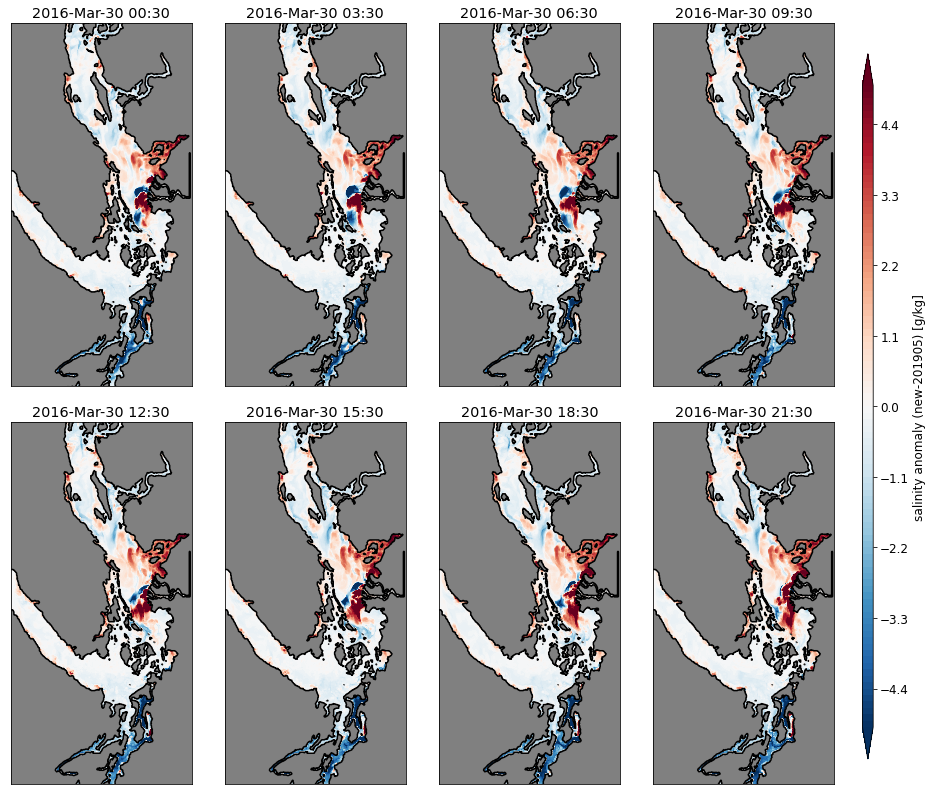

In [25]:
mask = xr.open_dataset('/home/bmoorema/MEOPAR/grid/mesh_mask202108.nc')
T_old = xr.open_dataset(results_path + '/SalishSea_1h_20160330_20160330_grid_T.nc')
T_new = xr.open_dataset(results_path + '/SalishSea_1h_20160101_20160331_grid_T.nc').isel(time_counter=slice(-24, None))
tmask = mask.tmask[0, 0, 1:, 1:].values

fig, axs = plt.subplots(2, 4, figsize=(15, 14), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})
for ax, t in zip(axs.ravel(), range(0, 24, 3)):

    timestr = T_new.time_counter.isel(time_counter=t).values.astype('datetime64[s]').astype(datetime).strftime('%Y-%b-%d %H:%M')
    sal_anomaly = np.subtract(*[T.vosaline.isel(time_counter=t, deptht=0).values for T in (T_new, T_old)])
    
    c = ax.contourf(sal_anomaly, levels=np.arange(-5, 5.1, 0.1), cmap='RdBu_r', extend='both')
    ax.contourf(tmask, levels=[-0.01, 0.01], colors='gray')
    ax.contour(tmask, levels=[-0.01, 0.01], colors='k')
    ax.set_ylim([50, 750])
    ax.set_title(timestr)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_aspect(5/4.4)

cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='salinity anomaly (new-201905) [g/kg]')